# Суть проєкту

В проєкті буде створено модель руху кульки під дією сили тяжіння. Буде обчислено та візуалізовано траекторію кульки, кинутої під деяким кутом до горизонту.

Для виконання знадобиться NumPy та Matplotlib

# Імпорт бібліотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

* `numpy` для математичних розрахунтів
* `matplotlib` для візуалізації

# Задання початкових умов

Тут буде визначено початкові параметри, як от початкові швидкість, кут запуску, прискорення вільного падіння та початкові координати.

In [ ]:
# прискорення вільного падіння (в м/с^2)
g = 9.81

# початкова швидкість кульки (в м/с)
v0 = 20

# кут запуску (в градусах)
angleDeg = 45

# початкові координати
x0 = 0
y0 = 0

# Переведення кута в радіани

Для можливості проведення математичних операцій над кутами, градуси необхідно перевести в радіани.

Для цього буде використано функцію `deg2rad`

In [ ]:
# переведення кута в радіани
angleRad = np.deg2rad(angleDeg)

# Обчислення компонентів початкової швидкості

Початкову швидкість також потрібно розділити на вертикальну та горизонтальну компоненти

In [ ]:
# горизонтальна початкова швидкість
v0_x = v0 * np.cos(angleRad)

# вертикальна початкова швидкість
v0_y = v0 * np.sin(angleRad)

Чому синус та косинус?

## Суть тригонометрії в контексті задачі

Уявімо, що кулька кидається під кутом $θ$ (в градусах або радіанах) до горизонту з початковою швидкістю $v_0$. Це означає, що напрямок швидкості утворює кут $θ$ з горизонтальною віссю.

Коли ми роздглядаємо рух під кутом, можна розділити початкову швидкість $v_0$ на дві складові:
* **Горизонтальна компонента швидкості** ($v_{0_x}$): це складова швидкості в напрямку горизонтальної осі $x$.
* **Горизонтальна компонента швидкості** ($v_{0_y}$): це складова швидкості в напрямку верикальної осі $y$.

## Як синус та косинус допомагають

Розглянемо трикутник, який утворюється, якщо провести прямі, що відповідають цим компонентам швидкості. У ньому:
* $v_0$ - гіпотенуза трикутника
* $v_{0_x}$ - прилегла до кута $θ$ сторона.
* $v_{0_y}$ - протилежна до кута $θ$ сторона.

Використовуючи основні тригонометричні співвідношення:
* Косинус кута $θ$ дорівнює відношенню прилеглої сторони (горизонтальна компонента) до гіпотенузи:
\begin{equation*}
\cos(\theta) = \frac{v_{0_x}}{v_0}
\end{equation*}
Звідси, горизонтальна компонента швидкості:
\begin{equation*}
v_{0_x} = {v_0} \cdot \cos(\theta)
\end{equation*}
* Синус кута $θ$ дорівнює відношенню протилежної сторони (горизонтальна компонента) до гіпотенузи:
\begin{equation*}
\sin(\theta) = \frac{v_{0_y}}{v_0}
\end{equation*}
Звідси, вертикальна компонента швидкості:
\begin{equation*}
v_{0_y} = {v_0} \cdot \sin(\theta)
\end{equation*}

Таким чином, синус та косинус використовуються, щоб розкласти початкову швидкість $v_0$ на її компоненти по горизонталі та вертикалі. Це дозволяє можелювати рух кульки окрмо в кожному напрямку.
* **Горизонтальний рух** не змінюється з часом (немає горизонтального прискорення), тому $v_{0_x}$ залишається постійним.
* **Вертикальний рух** змінюється під дією прискорення вільного падіння $g$, тому $v_{0_y}$ змінюється з часом.

# Обрахування часу польоту

Тут буде обчислено час польоту кульки до моменту, поки вона не впаде на землю (y = 0).

Час польоту можна знайти, використовуючи формулу вертикального руху для тіла, кинутого під кутом до горизонту. Вона враховує початкову вертикальну швидкість та прискорення вільного падіння. Вертикальне положення тіла $y(t)$ у будь-який момент часу $t$ описується рівнянням руху з примкоренням:
\begin{equation*}
y(t) = y_0 + v_{0_y} \cdot t - \frac{1}{2}g \cdot t^2
\end{equation*}

**Розшифрування формули:**

* $y(t)$ - вертикальна координата тіла в момент чаму $t$.
* $y_0$ - початкова вертикальна координата тіла. Якщо тіло стартує з землі, то $y_0 = 0$.
* $v_{0_y}$ - початкова вертикальна компонента швидкосі, яка обчислюється за допомогою синуса кута $\theta$:
\begin{equation*}
v_{0_y} = {v_0} \cdot \sin(\theta)
\end{equation*}
* $t$ - час, що минув від початку руху.
* $g$ - прискорення вільного падіння (приблизно $9.81 м/с^2$ на Землі).
* $\frac{1}{2}g \cdot t^2$ - зменшення висоти через дію сили тяжіння.

**Пояснення:**
* $v_{0_y} \cdot t$ - цей член показує, як вертикальна компонента початкової швидкості впливає на підйом тіла. Якщо $v_{0_y}$ додатна, тіло піднімається вгору. Якщо від'ємна - падає вниз.
* $\frac{1}{2}g \cdot t^2$ - цей член враховує вплив сили тяжіння, яка поступово сповільнює підйом тіла (зменшує висоту) і зрештою змушує його падати вниз.

Ця формула дозволяє обчислити висоту тіла в будь-який момент часу, поки воно рухається під дією сили тяжіння.


In [ ]:
# час підйому кульки до найвищої точки
t_up = v0_y / g

# час падіння кульки (такий самий, як час підйому)
t_down = t_up

# загальний час польоту
T = t_up + t_down

# Розрахунок траекторії

Для розрахунку траекторії, час польоту буде поділено на 500 однакових інтервалів функцією `linspace`. Положення кульки буде обчислено для кожного моменту часу.

In [ ]:
# створення масиву часу
t = np.linspace(0, T, num=500)

# розрахунок координат
x = x0 + v0_x * t
y = y0 + v0_y * t - 0.5 * g * t**2

# Візуалізація траекторії

За допомогою Matplotlib буде побудовано графік траекторії польоту кульки.

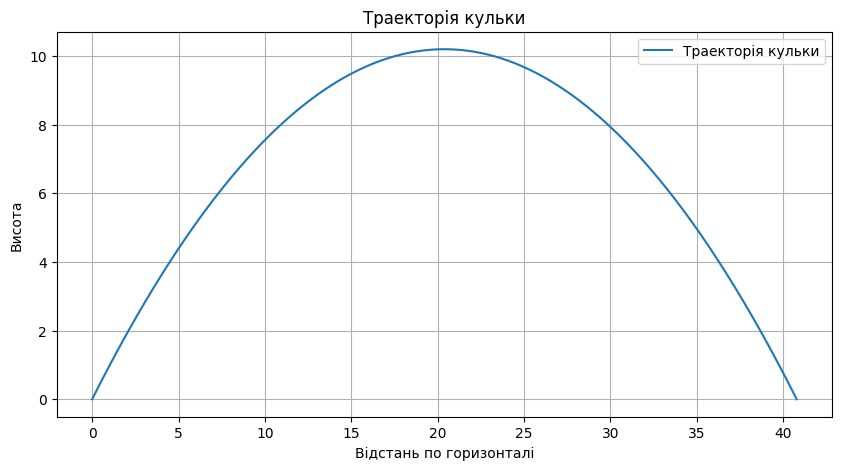

In [ ]:
# створення графіка
plt.figure(figsize=(10, 5))
plt.plot(x, y, label = 'Траекторія кульки')

# додавання підписів та сітки
plt.title("Траекторія кульки")
plt.xlabel('Відстань по горизонталі')
plt.ylabel('Висота')
plt.grid(True)
plt.legend()

# відображення графіка
plt.show()

# Пояснення змінних
* `g` - прискорення вільного падіння, яке є постійним.
* `v0` - початкова швидкість кульки.
* `angleDeg` - кут запуску кульки, переведений з градусів у радіани для використання у тригонометричних функціях.
* `v0_x` та `v0_y` - горизонтальна та вертикальна компоненти початкової швидкості, які було отримано, використовуючи тригонометричні функції.
* `T` - загальний час польоту кульки.
* `x` та `y` - масиви координат кульки в кожен момент часу.